In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow.keras import models, layers

In [5]:
path=r"train.csv"
df=pd.read_csv(path)
if 'UID' in df.columns:
    df = df.set_index('UID')
    new_df=df.copy()
df=df.drop(columns=['ph_no','credit_card_number','email','name','url','cvv','country','job','emoji'])#does not affect the output


In [6]:
Y=df['state']
df=df.drop(columns=['state'])

In [7]:

# Define a regular expression pattern to extract floating-point numbers
pattern = r'(-?\d+\.\d+)'

# Use str.extract to apply the pattern column-wise
df = df.apply(lambda x: x.str.extract(pattern, expand=False))

# Convert the extracted values to numeric
df = df.apply(pd.to_numeric, errors='coerce')


In [13]:
df.describe()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
count,138761.000000,138777.000000,138736.000000,138728.000000,138713.000000,138709.000000,138654.000000,138773.000000,138761.000000,138644.000000,...,138703.000000,138683.000000,138696.000000,138748.000000,138676.000000,138746.000000,138689.000000,138688.000000,138740.000000,138685.000000
mean,0.405623,0.700885,-0.228169,0.038084,0.080741,1.088124,-0.099424,-0.508855,-0.086820,-0.461384,...,1.749606,-0.352595,-0.097552,-0.872785,-0.190779,-0.202942,0.304085,0.021870,0.982778,-0.006658
std,4.207810,17.316074,18.558254,16.804733,4.198671,19.251276,4.144329,17.998698,4.255966,17.002255,...,19.961617,19.173462,4.214975,14.922001,4.232022,4.153763,4.121639,4.232307,19.696209,4.146676
min,-17.378663,-77.636372,-88.816744,-84.533117,-20.864162,-88.800077,-20.083547,-88.428950,-18.442479,-79.156959,...,-86.398081,-88.274028,-20.444630,-70.024310,-18.823306,-18.528236,-18.311135,-19.833364,-97.657266,-18.691201
25%,-2.421919,-10.766546,-12.556615,-11.265699,-2.735720,-11.844879,-2.862022,-12.588352,-2.950469,-11.767128,...,-11.667677,-13.188030,-2.926210,-10.804452,-3.040233,-3.016949,-2.471048,-2.826263,-12.231083,-2.800190
50%,0.411023,0.829260,-0.215681,-0.115716,0.073549,1.085606,-0.080195,-0.624914,-0.081912,-0.244787,...,1.730703,-0.298878,-0.077281,-0.820220,-0.183061,-0.209118,0.312054,0.007508,0.774899,-0.020755
75%,3.224626,12.346383,12.176671,11.143424,2.907034,14.017467,2.689317,11.355298,2.789168,10.971212,...,15.137703,12.558143,2.746927,9.170924,2.670074,2.589425,3.092985,2.865800,14.006714,2.767928
max,19.441730,81.743863,77.957198,76.521389,18.870930,86.574856,19.113702,85.249397,18.095460,80.198581,...,90.727512,90.114963,18.997582,64.256785,19.636270,18.474009,19.516091,18.421846,102.783205,18.189089


In [24]:
# df_imputed = df.fillna(df.median())
#use knn
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# df_imputed = imputer.fit_transform(df)
# df_imputed = pd.DataFrame(df_imputed, columns = df.columns)
# df_imputed.describe()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(df)

from sklearn.preprocessing import QuantileTransformer


transformer = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')

# Fit and transform the entire dataset
transformed_data = transformer.fit_transform(imputed_data)

# Convert the transformed data back to a DataFrame
df_imputed = pd.DataFrame(transformed_data, columns=df.columns)

# Display the transformed DataFrame
df_imputed

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
0,0.271757,0.003041,0.663157,0.774856,0.386445,0.722778,0.409112,0.429566,0.519147,0.178729,...,0.010459,0.692546,0.481381,0.144018,0.093866,0.875010,0.601252,0.294314,0.640884,0.048658
1,0.583687,0.333642,0.179308,0.921702,0.782962,0.769680,0.676964,0.933893,0.788037,0.208606,...,0.801875,0.019077,0.824425,0.089255,0.864604,0.508792,0.774877,0.979525,0.472472,0.003785
2,0.840993,0.886129,0.993347,0.126438,0.149543,0.770834,0.719599,0.017780,0.498999,0.994047,...,0.365798,0.961911,0.945858,0.987066,0.405011,0.315921,0.940835,0.658352,0.028621,0.980604
3,0.060188,0.716435,0.120056,0.987264,0.943357,0.186924,0.593681,0.765008,0.207607,0.035932,...,0.269076,0.273961,0.006481,0.964306,0.707942,0.965832,0.441247,0.095295,0.886203,0.416695
4,0.038921,0.211960,0.586805,0.646161,0.133786,0.519417,0.068101,0.105524,0.018151,0.081068,...,0.480159,0.723816,0.357199,0.124333,0.531105,0.831907,0.848252,0.181024,0.814587,0.992897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,0.643723,0.336090,0.147399,0.247794,0.812493,0.205767,0.799627,0.830101,0.242611,0.480824,...,0.718091,0.559356,0.620530,0.541286,0.529100,0.888733,0.349982,0.488737,0.905001,0.664178
139996,0.271447,0.540110,0.959523,0.592044,0.793190,0.931877,0.442808,0.171778,0.165375,0.207167,...,0.047619,0.280916,0.670814,0.429358,0.972819,0.693966,0.919222,0.582420,0.929762,0.889338
139997,0.416964,0.319759,0.999001,0.722396,0.277019,0.520766,0.100374,0.436558,0.054103,0.997397,...,0.645675,0.474312,0.324348,0.646453,0.219451,0.623757,0.215796,0.566319,0.790054,0.966279
139998,0.487548,0.519642,0.652498,0.789285,0.580805,0.943057,0.030974,0.747444,0.070794,0.802853,...,0.380967,0.480800,0.413228,0.603914,0.819815,0.810227,0.116801,0.229466,0.742291,0.085354


<Axes: >

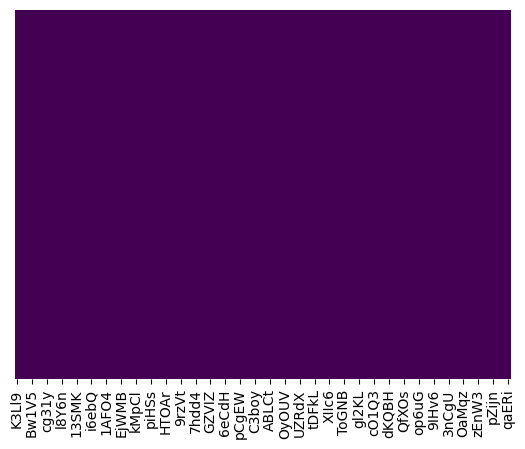

In [17]:
sns.heatmap(df_imputed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#handle correlated features
corr_matrix = df_imputed.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_imputed=df_imputed.drop(columns=to_drop)


In [26]:
print(to_drop)

['7hdd4', 'aUxm5', 'eWCdk', 'sRaqu', 'op6uG', 'dTj0P', 'pZijn', 'WUc3c']


In [27]:
def outliers_to_median(df):
    for col in df.columns:
        median = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df[col] = df[col].apply(lambda x: median if x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr) else x)
    return df

# Apply outlier handling to the entire DataFrame
df = outliers_to_median(df_imputed)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [29]:
scaled_df.describe()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,sCIyG,qaERi
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,...,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,0.502261,0.496500,0.501641,0.499231,0.499553,0.497397,0.497015,0.501499,0.497171,0.500590,...,0.494829,0.500513,0.501342,0.501476,0.496855,0.496580,0.498374,0.500768,0.502470,0.501279
std,0.288928,0.288267,0.287812,0.290360,0.288604,0.289072,0.289263,0.287647,0.288736,0.289462,...,0.289312,0.289448,0.287953,0.287410,0.288237,0.289311,0.289960,0.290156,0.287081,0.287581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251236,0.247276,0.252738,0.246124,0.250375,0.245968,0.244436,0.250560,0.245286,0.251778,...,0.243819,0.251548,0.254648,0.253307,0.243458,0.244474,0.245537,0.247927,0.258340,0.252775
50%,0.504004,0.494494,0.506006,0.495996,0.494494,0.495996,0.495495,0.503504,0.498999,0.501001,...,0.492993,0.501502,0.502503,0.500000,0.494995,0.496496,0.496496,0.502503,0.503003,0.498498
75%,0.752941,0.741887,0.750001,0.752388,0.749052,0.750250,0.748908,0.750551,0.745620,0.753402,...,0.745935,0.749893,0.749626,0.747778,0.746896,0.749931,0.749344,0.750759,0.747740,0.751357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x=scaled_df
#one hot encoded y
enc=OneHotEncoder()
y=enc.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
model = models.Sequential()
model.add(layers.Dense(500, activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
trained_model=model.fit(x_train,y_train,batch_size=100,epochs=55,validation_data=(x_test,y_test))

Epoch 1/55
1120/1120 [==============================] - 7s 6ms/step - loss: 0.9550 - accuracy: 0.6940 - val_loss: 0.8897 - val_accuracy: 0.7165
Epoch 2/55
1120/1120 [==============================] - 6s 5ms/step - loss: 0.7820 - accuracy: 0.7569 - val_loss: 0.7665 - val_accuracy: 0.7551
Epoch 3/55
1120/1120 [==============================] - 6s 5ms/step - loss: 0.6452 - accuracy: 0.8037 - val_loss: 0.6225 - val_accuracy: 0.8090
Epoch 4/55
1120/1120 [==============================] - 6s 5ms/step - loss: 0.5426 - accuracy: 0.8374 - val_loss: 0.5686 - val_accuracy: 0.8231
Epoch 5/55
1120/1120 [==============================] - 5s 5ms/step - loss: 0.4704 - accuracy: 0.8607 - val_loss: 0.4721 - val_accuracy: 0.8610
Epoch 6/55
1120/1120 [==============================] - 4s 4ms/step - loss: 0.4145 - accuracy: 0.8796 - val_loss: 0.4389 - val_accuracy: 0.8675
Epoch 7/55
1120/1120 [==============================] - 4s 4ms/step - loss: 0.3714 - accuracy: 0.8954 - val_loss: 0.4137 - val_accuracy:

In [35]:
model.evaluate(x_test,y_test)

875/875 [==============================] - 3s 3ms/step - loss: 0.2496 - accuracy: 0.9400


[0.24962879717350006, 0.9399999976158142]

In [37]:
ensemble = []
ensemble.append(model)
from sklearn.ensemble import RandomForestClassifier

for i in range(2):
    rf_model = RandomForestClassifier(n_estimators=90)  
    rf_model.fit(x_train, y_train)
    ensemble.append(rf_model)
    print(i,"done")
    print(rf_model.score(x_test,y_test))



0 done
0.012107142857142858


KeyboardInterrupt: 

In [82]:
# model.evaluate(x_test,y_test)


In [85]:
predictions = []
for model_pred in ensemble:
    y_pred = model_pred.predict(x_test)
    predictions.append(y_pred)

875/875 [==============================] - 1s 2ms/step


In [93]:
from sklearn.metrics import accuracy_score
#use ensemble voting to predict
y_pred = np.zeros((len(x_test),))
for i in range(len(x_test)):
    counts = np.bincount([np.argmax(np.squeeze(pred[i])) for pred in predictions])
    y_pred[i] = np.argmax(counts)

# Convert y_test to multiclass format
y_test_mc = np.argmax(y_test, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_test_mc, y_pred)

# Print accuracy score
print("Accuracy score:", accuracy)


Accuracy score: 0.11235714285714286


In [52]:
path="test.csv"
#do all the preprocessing done to train.csv
df2=pd.read_csv(path)
if 'UID' in df2.columns:
    df2 = df2.set_index('UID')
df2=df2.drop(columns=['ph_no','credit_card_number','email','name','url','cvv','country','job','emoji'])#does not affect the output


In [54]:
pattern = r'(-?\d+\.\d+)'

# Use str.extract to apply the pattern column-wise
df2 = df2.apply(lambda x: x.str.extract(pattern, expand=False))

# Convert the extracted values to numeric
df2 = df2.apply(pd.to_numeric, errors='coerce')

In [55]:
df2

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
UID,,,,,,,,,,,,,,,,,,,,,
675919160,2.887040,-7.309923,19.071947,-20.583563,-3.338531,35.718716,-3.314161,12.582761,0.968303,5.687697,...,-21.248937,-5.726684,1.577796,-8.911004,5.981008,-1.297894,-1.673945,1.446459,-29.421645,1.795004
V09461652,5.654553,6.050330,2.923975,-15.514720,-0.061644,-1.254137,6.067391,3.048152,-1.617459,7.014764,...,-33.934399,-19.149704,-2.868718,15.453724,-6.211322,-0.933979,0.001376,-4.159291,-1.540406,1.296943
S75396644,3.053784,25.244685,6.269036,0.076592,-1.813872,43.845319,-0.819727,11.620422,-2.116804,9.157089,...,12.391218,-14.048287,-5.027959,6.754527,7.670390,0.347081,1.407364,6.091721,-22.070410,-3.748772
598599835,1.488450,0.283862,27.788565,28.980005,-1.681160,-1.215674,-0.598728,21.140887,3.825426,14.212199,...,11.456072,-12.459837,-3.448771,20.407682,-1.601812,1.355095,0.979308,-1.409996,2.120580,-3.924106
W60397022,10.885250,-22.040204,-7.699833,22.169769,6.763151,14.833072,-6.158491,20.194413,0.961350,0.608986,...,19.865807,-24.537809,1.106189,-14.192347,3.930237,9.832580,-0.672717,-7.779142,15.756719,-7.693867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G18996472,-3.449114,-7.364562,-12.543183,-33.475045,1.433123,7.984281,-3.486359,26.646217,-1.562326,1.489204,...,19.649591,-8.807412,8.620351,-1.111601,2.367149,-1.469333,1.480501,2.712732,-8.616272,-7.006872
119545284,-2.510711,-13.983728,33.684391,-1.341565,2.141081,30.300519,-7.994206,10.898682,-4.059479,12.568448,...,NaN,-39.585549,2.507032,1.835891,-0.362596,3.059471,3.154485,1.802282,4.723408,-4.572501
Q57447995,4.856940,-14.733054,-1.945138,13.639729,NaN,-27.256234,-5.715546,3.610817,6.290513,14.360807,...,32.368422,-19.829218,5.767188,-18.795186,-9.603047,-3.901352,3.412305,4.303302,-23.636226,0.553597


In [58]:
# df2_imputed = df2.fillna(df.median())
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputed_data_2= imputer.fit_transform(df2)

from sklearn.preprocessing import QuantileTransformer


transformer = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')

# Fit and transform the entire dataset
transformed_data_2 = transformer.fit_transform(imputed_data_2)

# Convert the transformed data back to a DataFrame
df2_imputed= pd.DataFrame(transformed_data_2, columns=df2.columns)
#set id as uid
df2_imputed['UID']=df2.index
df2_imputed=df2_imputed.set_index('UID')


In [59]:
df2_imputed

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
UID,,,,,,,,,,,,,,,,,,,,,
675919160,0.714512,0.316307,0.849243,0.113108,0.210281,0.963563,0.214255,0.771249,0.597734,0.642110,...,0.124366,0.388033,0.662555,0.292214,0.929992,0.390003,0.307467,0.635848,0.059355,0.679244
V09461652,0.891160,0.629012,0.570808,0.182308,0.488176,0.450291,0.932969,0.585599,0.359676,0.673772,...,0.034788,0.164027,0.253903,0.861488,0.080164,0.428924,0.460434,0.171017,0.452404,0.634508
S75396644,0.727341,0.927531,0.638334,0.511807,0.325005,0.987632,0.425000,0.754368,0.317235,0.716563,...,0.701889,0.235279,0.119855,0.698082,0.970180,0.560332,0.605711,0.926858,0.119394,0.178447
598599835,0.597541,0.489017,0.932068,0.955257,0.337333,0.451146,0.444093,0.885519,0.825569,0.805075,...,0.683355,0.262092,0.210795,0.922379,0.370258,0.654968,0.568740,0.376885,0.538039,0.164508
W60397022,0.992638,0.095270,0.335081,0.906657,0.941041,0.766449,0.068666,0.876243,0.597069,0.527452,...,0.820018,0.105916,0.621004,0.180551,0.835095,0.992785,0.396695,0.035373,0.787513,0.029676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G18996472,0.183167,0.315152,0.243894,0.023551,0.633553,0.643019,0.203701,0.936778,0.364859,0.548150,...,0.816817,0.331017,0.983051,0.483149,0.730151,0.374854,0.612365,0.740714,0.311810,0.042603
119545284,0.251341,0.192358,0.965875,0.470700,0.690746,0.937005,0.027848,0.741450,0.176143,0.778384,...,0.492993,0.020586,0.734269,0.574344,0.484472,0.790303,0.757595,0.666004,0.590182,0.129848
Q57447995,0.849089,0.183092,0.458299,0.798608,0.506006,0.069732,0.082473,0.597583,0.932051,0.806826,...,0.939278,0.155785,0.917640,0.112279,0.012447,0.181358,0.777125,0.845064,0.104555,0.569813


In [60]:
df2_imputed_dropped=df2_imputed.drop(columns=to_drop)

In [61]:
df2 = outliers_to_median(df2_imputed_dropped)

# Display the transformed DataFrame
df2

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,Bz7Ov,uN0aA,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,sCIyG,qaERi
UID,,,,,,,,,,,,,,,,,,,,,
675919160,0.714512,0.316307,0.849243,0.113108,0.210281,0.963563,0.214255,0.771249,0.597734,0.642110,...,0.181106,0.860022,0.124366,0.388033,0.662555,0.292214,0.929992,0.390003,0.059355,0.679244
V09461652,0.891160,0.629012,0.570808,0.182308,0.488176,0.450291,0.932969,0.585599,0.359676,0.673772,...,0.036945,0.550707,0.034788,0.164027,0.253903,0.861488,0.080164,0.428924,0.452404,0.634508
S75396644,0.727341,0.927531,0.638334,0.511807,0.325005,0.987632,0.425000,0.754368,0.317235,0.716563,...,0.473936,0.312972,0.701889,0.235279,0.119855,0.698082,0.970180,0.560332,0.119394,0.178447
598599835,0.597541,0.489017,0.932068,0.955257,0.337333,0.451146,0.444093,0.885519,0.825569,0.805075,...,0.350716,0.867604,0.683355,0.262092,0.210795,0.922379,0.370258,0.654968,0.538039,0.164508
W60397022,0.992638,0.095270,0.335081,0.906657,0.941041,0.766449,0.068666,0.876243,0.597069,0.527452,...,0.449298,0.924544,0.820018,0.105916,0.621004,0.180551,0.835095,0.992785,0.787513,0.029676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G18996472,0.183167,0.315152,0.243894,0.023551,0.633553,0.643019,0.203701,0.936778,0.364859,0.548150,...,0.450722,0.995231,0.816817,0.331017,0.983051,0.483149,0.730151,0.374854,0.311810,0.042603
119545284,0.251341,0.192358,0.965875,0.470700,0.690746,0.937005,0.027848,0.741450,0.176143,0.778384,...,0.639774,0.872179,0.492993,0.020586,0.734269,0.574344,0.484472,0.790303,0.590182,0.129848
Q57447995,0.849089,0.183092,0.458299,0.798608,0.506006,0.069732,0.082473,0.597583,0.932051,0.806826,...,0.076263,0.299759,0.939278,0.155785,0.917640,0.112279,0.012447,0.181358,0.104555,0.569813


In [62]:
category_mappings = enc.categories_
category_mappings

[array(['Anxiety', 'Death', 'Despair', 'Dread', 'Fatigue', 'Nausea',
        'Pain', 'Stress', 'Tears', 'Worthlessness'], dtype=object)]

In [63]:
#predict df2 using model
y_pred = model.predict(df2)

#use category_mappings
y_pred = np.argmax(y_pred, axis=1)

y_pred = category_mappings[0][y_pred]
y_pred
#store only state in csv
df2['state']=y_pred
df2['state'].to_csv('submission.csv', header=True)


1875/1875 [==============================] - 6s 3ms/step


In [ ]:
predictions = []
for model in ensemble:
    y_pred = model.predict(df2)
    predictions.append(y_pred)

# Combine predictions using majority voting (mode)
ensemble_predictions = pd.DataFrame(predictions).mode(axis=0).squeeze()

# Use category_mappings to map ensemble predictions to category names
y_category_indices = np.argmax(ensemble_predictions, axis=1)
y_category = [category_mappings[i][index] for i, index in enumerate(y_category_indices)]

# Assuming UID is in df2 as well
uids = df2['UID']

# Create a DataFrame with UID and state
result_df = pd.DataFrame({'UID': uids, 'state': y_category})

# Store the results in a CSV file
result_df.to_csv('output.csv', header=True, index=False)


1875/1875 [==============================] - 3s 2ms/step


C:\Users\soham\AppData\Local\Temp\ipykernel_14552\3806288089.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2['state'] = y_category


In [ ]:
predictions = []
for model in ensemble:
    new_data_predictions = model.predict(df2)
    predictions.append(new_data_predictions)

# Combine predictions using majority voting (mode)
ensemble_predictions = pd.DataFrame(predictions).mode(axis=0).squeeze()

In [ ]:
#from category mappings 
y_category = category_mappings[0][ensemble_predictions]
#store UID and state in csv
df2['state'] = y_category
df2['state'].to_csv('output.csv', header=True)

In [65]:
print('hi')


hi
